## Avaliação técnica — Quaest, Data Scientist Jr.
O objetivo deste teste é avaliar um pouco suas habilidades como cientista de dados e, também, demonstrar como será parte do seu dia a dia atuando na Quaest.

A atividade consiste em analisar um survey. Para isso, em anexo, o arquivo 'bd_surveyquaest.xlsx' consiste em uma base de dados resumida e fictícia, contendo as seguintes variáveis:

* sbjnum: id do respondente
* sexo: sexo do respondente
* idade: idade (numérica) do respondente
* rendaf: renda familiar do respondente
* esc: escolaridade do respondente
* aval_gov: avaliação do governo
* voto1: intenção de voto do respondente.
A partir da base de dados, você irá desenvolver duas atividades:

1)Crie uma função em alguma linguagem de programação, preferencialmente em R ou Python, que automatize a construção de tabelas de contingência. O objetivo é identificar se há uma diferença sociodemográfica na intenção de voto. Em outras palavras, por ex.: As mulheres e os homens estão votando no mesmo candidato ?

Ainda com essa base de dados, construa dois gráficos.

2.1) O primeiro gráfico será da variável intenção de voto.

2.2) Já o segundo, plot um gráfico que represente o cruzamento entre as variáveis intenção de voto e avaliação do governo. Quem avalia o governo de forma positiva, vota em qual candidato ? E quem avalia de forma negativa ?

### Respostas

Primeiramente fiz a importação de todas as bibliotecas que eu provavelmente iria utilizar, acabo que sempre importo alguma a mais porque fico testando o código e tal. 
Avaliando o que me foi pedido, a principio será uma função e dois gráficos visuais.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
import numpy as np

Por força do hábito acabei salvando como CSV, e fiz a importação normalmente.

In [2]:
df = pd.read_csv("bd_surveyquaest.csv")

Apesar de ja ter visto os dados em Excel, resolvi ver como se encontrava o dataset

In [3]:
df.head()

,sbjnum,sexo,idade,rendaf,esc,aval_gov,voto1
0,136037235,Masculino,57,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Candidato 2
1,136037575,Masculino,32,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,Ninguém/Branco/Nulo
2,136038074,Masculino,70,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
3,136041069,Masculino,50,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino fundamental incompleto,Ótima,Candidato 2
4,136041107,Masculino,24,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior incompleto,Boa,Candidato 2


Notei que o campo renda estava um pouco poluído, como em vários cenários poderia precisar utiliza-lo, ate mesmo em minha função do Ex1 resolvi deixar mais prático o entendimento do dado.

In [4]:
df.rendaf.value_counts()

De R$ 1.046,00 a R$ 2.090,00 (+ de 1SM até 2 SM)        246
De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)        210
Até R$ 1.045,00 (até 1 SM)                              205
De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)        177
De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10 SM)      110
De R$ 10.451,00 a R$ 15.675,00 (+ de 10SM até 15 SM)     28
De R$ 15.676,00 a R$ 20.900,00 (+ de 15SM até 20 SM)     17
Mais de R$ 20.900,00 (+ de 20 SM)                         7
Name: rendaf, dtype: int64

In [5]:
df['rendaf'] = df['rendaf'].map({'De R$ 1.046,00 a R$ 2.090,00 (+ de 1SM até 2 SM)':'Classe E',
                                'De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)':'Classe D',
                                'Até R$ 1.045,00 (até 1 SM)':'Classe E',
                                'De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)':'Classe C',
                                'De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10 SM)':'Classe C',
                                'De R$ 10.451,00 a R$ 15.675,00 (+ de 10SM até 15 SM)':'Classe B',
                                'De R$ 15.676,00 a R$ 20.900,00 (+ de 15SM até 20 SM)':'Classe B',
                                'Mais de R$ 20.900,00 (+ de 20 SM)':'Classe A'},
                             na_action=None)

A tabela de contingência é a tabela que calcula observações por múltiplas variáveis categóricas. As linhas e colunas das tabelas correspondem a essas variáveis categóricas.
No Python a forma de se criar uma tabela de contingência é através do crosstab, da biblioteca do Pandas. 
Sendo assim criei uma função onde é passado o df + a coluna e é retornada a tabela de contingência. Margins = False é para não calcular a margem.

In [6]:
def cont(coluna1, coluna2):
    t_cont = pd.crosstab(coluna1, coluna2, margins = False)
    return t_cont

Testando a função

In [7]:
cont(df.sexo, df.voto1)

voto1,Candidato 1,Candidato 10,Candidato 11,Candidato 12,Candidato 13,Candidato 14,Candidato 2,Candidato 3,Candidato 4,Candidato 5,Candidato 6,Candidato 7,Candidato 8,Candidato 9,NS/NR,Ninguém/Branco/Nulo
sexo,,,,,,,,,,,,,,,,
Feminino,11,14,1,3,2,6,295,9,4,14,7,3,14,7,83,72
Masculino,31,6,2,3,1,0,228,7,8,11,3,4,12,12,57,70


O segundo exércicio seria plotar as intenções de votos apenas.
Fui pelo método fig, ax pois estou mais acostumado a fazer assim, orientado a objetivos.

Meu ax eu utilizo o value_counts junto com o plot de 'bar', faço um pequeno método para ter as porcentagens.
Coloco título, título no eixo X, altero fontes, coloco lateralmente as infos para melhor visualização e faço toda uma função para colocar os rótulos de dados no próprio gráfico. Possivelmente foi minha maior dificuldade, até que achei um método que desse certo.

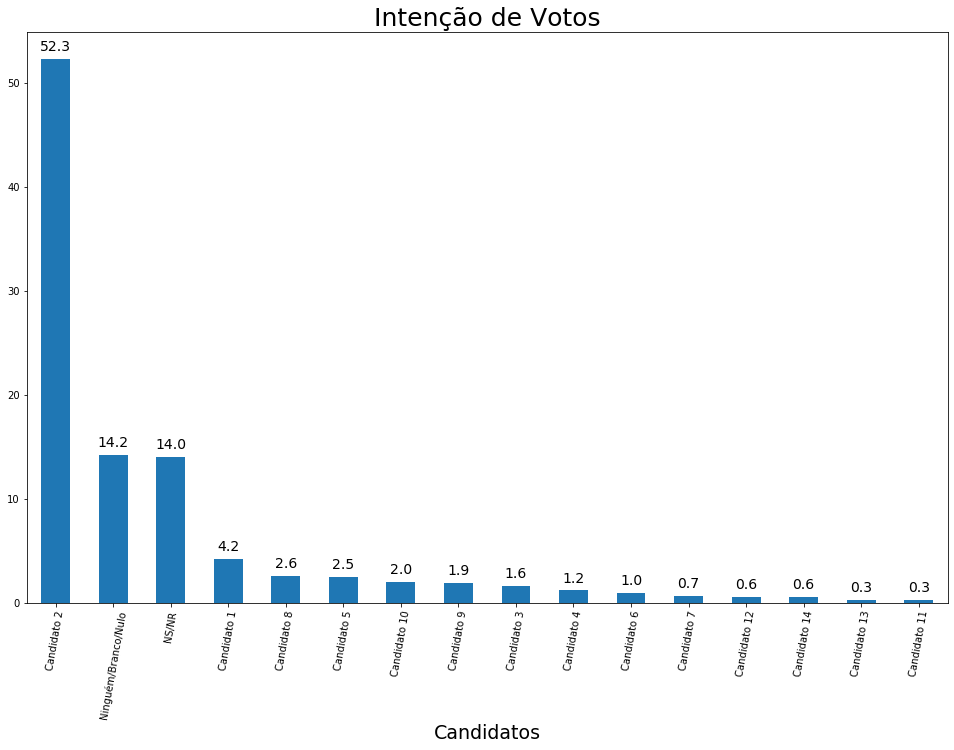

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(16.5, 10.5, forward=True)


ax = (df.voto1.value_counts(normalize=True) * 100).plot(kind='bar')

    
ax.set_title("Intenção de Votos", fontsize=25)
ax.set_xlabel("Candidatos", fontsize = 19)
plt.rcParams['xtick.labelsize'] = 13
plt.xticks(rotation=80)
plt.rcParams.update({'font.size': 14})


def add_value_labels(ax, spacing=5):
# Adicionar rótulos ao final de cada barra em um gráfico de barras.


# Para cada barra: coloque um rótulo
    for rect in ax.patches:
# Obtenha o posicionamento X e Y do rótulo de ret.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
# Número de pontos entre a barra e o rótulo. Mude ao seu gosto.
        space = spacing
# Alinhamento vertical para valores positivos
        va = 'bottom'
# Se o valor da barra for negativo: Coloque o rótulo abaixo da barra
        if y_value < 0:
# Inverta o espaço para colocar o rótulo abaixo
            space *= -1
# Alinhe o rótulo verticalmente na parte superior
            va = 'top'
# Use o valor Y como rótulo e número do formato com uma casa decimal

        label = "{:.1f}".format(y_value)
# Criar anotação
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                        
# Chame a função acima

add_value_labels(ax)

plt.show()

O segundo ponto do exércicio dois me pedia um gráfico com variáveis relacionadas, e me pediu como base a intenção de votos por avalição do governo.
Pensei logo no método do crosstab, pois encaixaria perfeitamente. Encontrei algumas dificuldades para plotar este gráfico, até que achei uma solução novamente na web que deu certo. Fiz minhas adaptações para meu modelo e deu certo.

As cores eu preferi colocar Verde para avaliações Boas, Vermelho para avaliações ruins e Azul para as Regulares tanto positiva quanto negativa. Dessa forma conseguimos visualizar bem as tendências, como por exemplo é bem nitida a preferência dos eleitores que veem o governo como ruim em votar no Candidato 11. Da mesma forma o Candidato 2 é o grande favorito, possivelmente é o atual gestor, ao julgar pelas avaliações e intenções de voto.

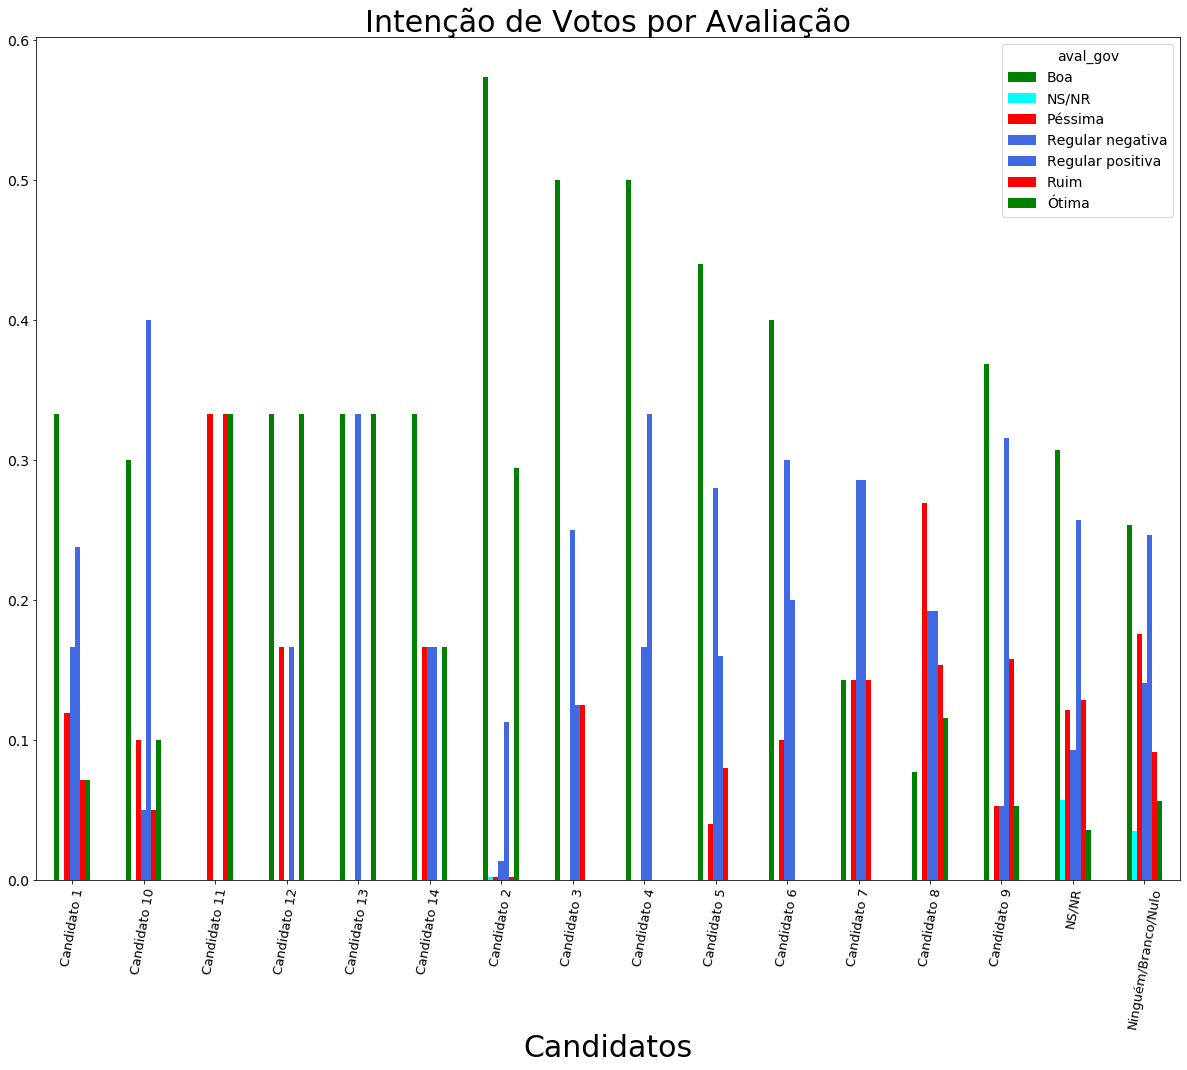

In [9]:
tab = pd.crosstab(df.voto1, df.aval_gov, normalize = 'index', margins=True)

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 15.5, forward=True)

ax.set_title("Intenção de Votos por Avaliação", fontsize=30)


tab.iloc[:-1].plot(ax=ax, kind='bar', color=['green','cyan','red','royalblue','royalblue','red','green'])
ax.set_xlabel("Candidatos", fontsize = 30)
plt.rcParams['xtick.labelsize'] = 20
plt.xticks(rotation=80)
plt.rcParams.update({'font.size': 14})

plt.show()

Não fazia parte da atividade, mas preferi realizar para validar, resolvi utilizar a função feita no exercício 1 com meu gráfico do exercício dois, para ter certeza se realmente estavam funcionando bem e corretamente.

O resultado foi:

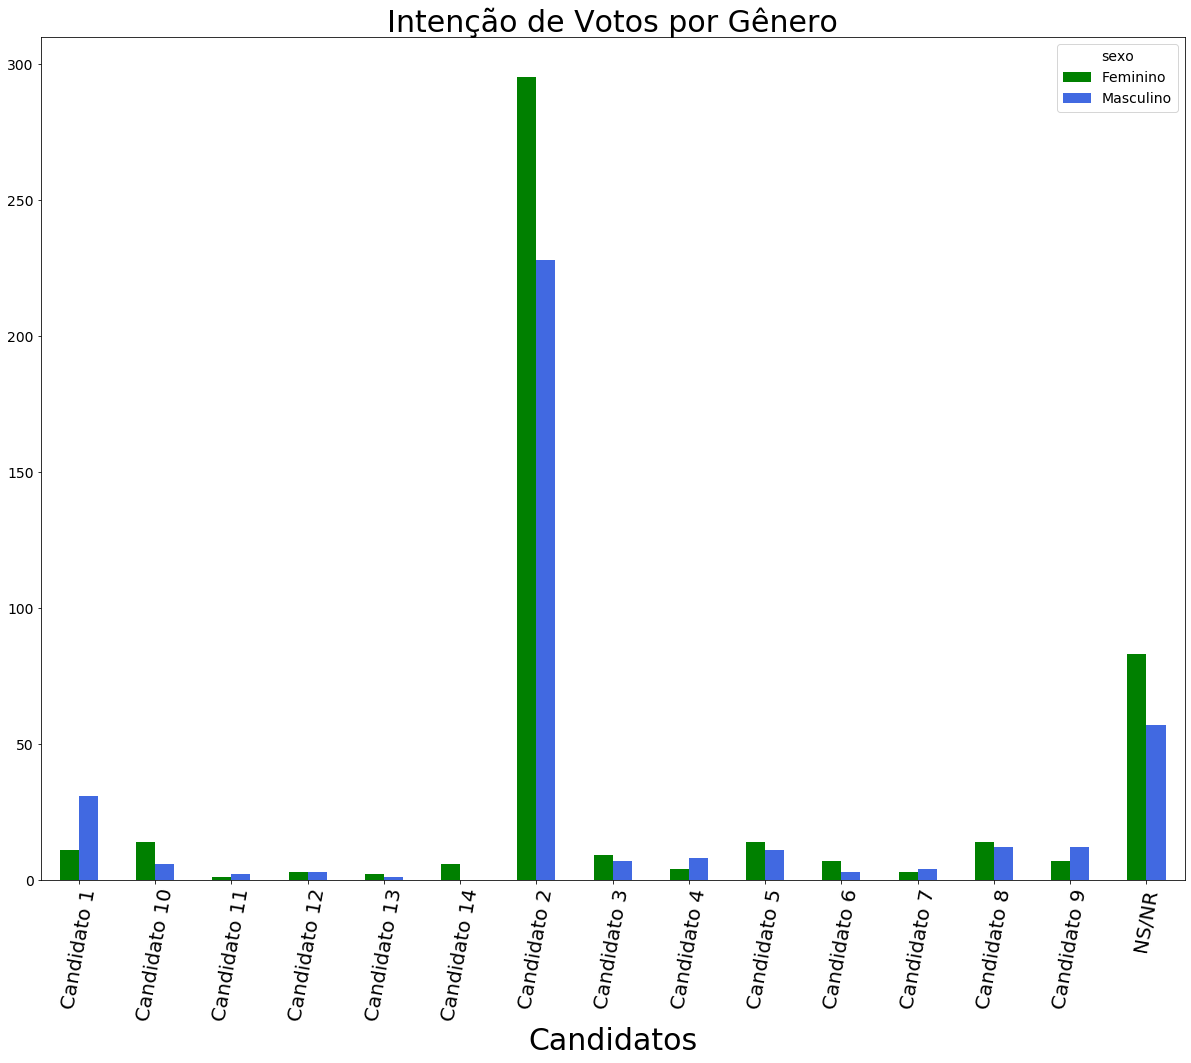

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 15.5, forward=True)

ax.set_title("Intenção de Votos por Gênero", fontsize=30)

#Aqui utilizo minha função "Cont"
cont(df.voto1, df.sexo).iloc[:-1].plot(ax=ax, kind='bar', color=['green','royalblue'])
ax.set_xlabel("Candidatos", fontsize = 30)
plt.rcParams['xtick.labelsize'] = 20
plt.xticks(rotation=80)
plt.rcParams.update({'font.size': 14})

plt.show()

E por curiosidade, qual a intenção de votos por classe social?

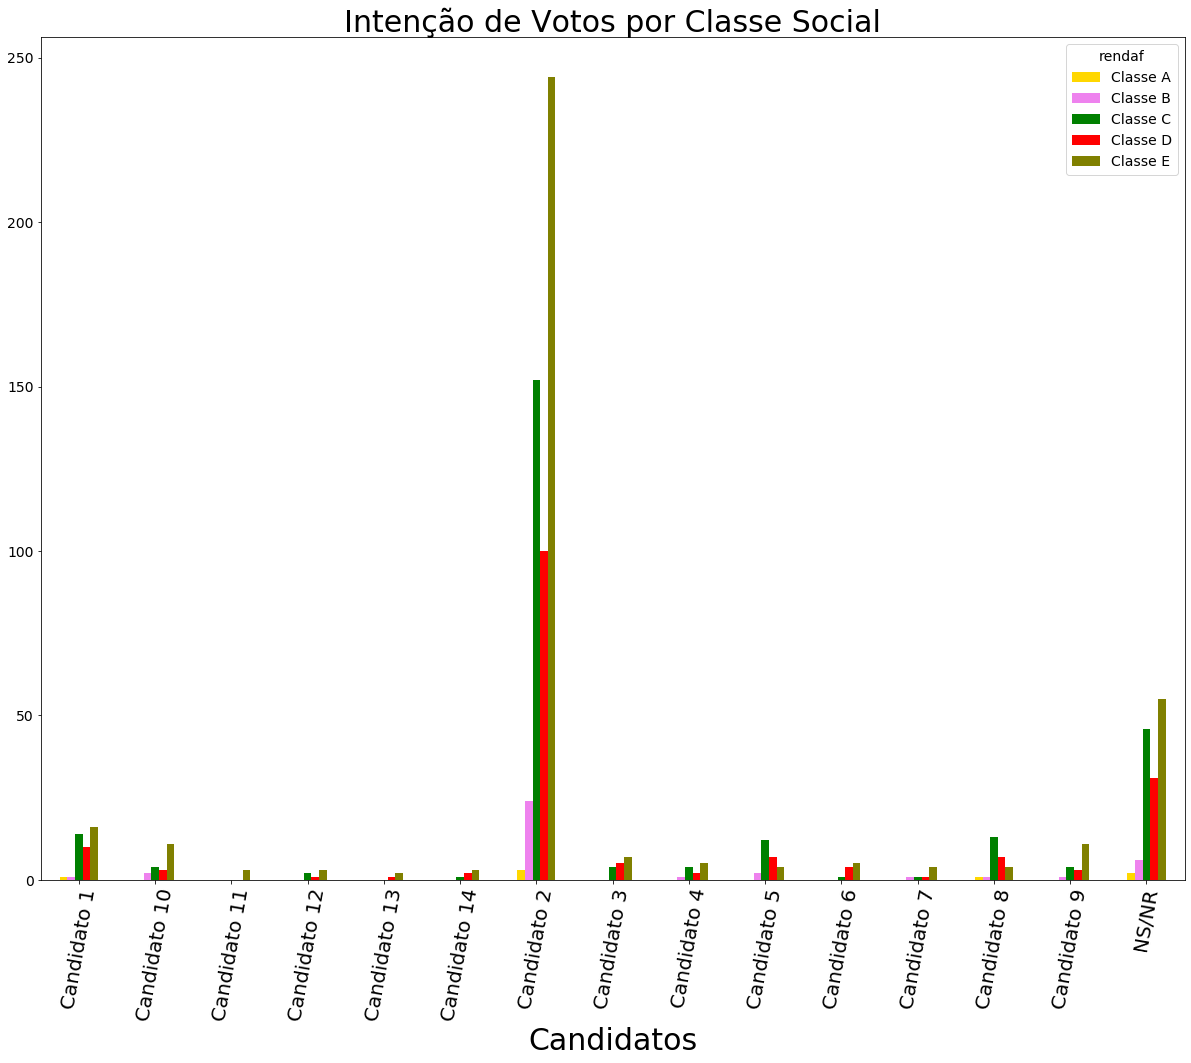

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 15.5, forward=True)

ax.set_title("Intenção de Votos por Classe Social", fontsize=30)

#Aqui utilizo minha função "Cont"
cont(df.voto1, df.rendaf).iloc[:-1].plot(ax=ax, kind='bar', color=['gold','violet', 'green', 'red', 'olive'])
ax.set_xlabel("Candidatos", fontsize = 30)
plt.rcParams['xtick.labelsize'] = 20
plt.xticks(rotation=80)
plt.rcParams.update({'font.size': 14})

plt.show()

### Conclusão

Minha conclusão final é que o Candidato 2 tem enorme vantagem e a princípio será eleito. Nota-se que ele não possui qualquer concorrente, fora ele mesmo, o "segundo mais votado" seria justamente os votos de quem ainda não tem um candidato.
O Candidato 2 lidera em todos os cenários, desde os mais pobres ate mesmo os mais ricos. 